In [1]:
%reset -f
from utils import *
from wavhandler import *
import os
import soundfile as sf
import matplotlib.pyplot as plt
from utils import np_hist

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
dataset = Dataset('v2_080919')#C. pomonella')#D. suzukii')
dataset.read(data='all', setting='read')
print(dataset.filenames.iloc[0])

Read 57 filenames in 0.00 seconds.
Loaded data into matrix in 0.01 seconds.
/home/kalfasyan/data/insects/v2_080919/F_20190809143432_0004_Temp22.6_Hum79.7_Opt00.24.wav


In [3]:
pd.to_datetime('20190809143432', format='%Y%m%d%H%M%S')

Timestamp('2019-08-09 14:34:32')

In [4]:
dataset.filenames.apply(lambda x: x.split('/')[6:]).iloc[0]
dataset.get_sensor_features(version='2')

VERSION 2


In [9]:
len(dataset.df_features.index.unique()

57

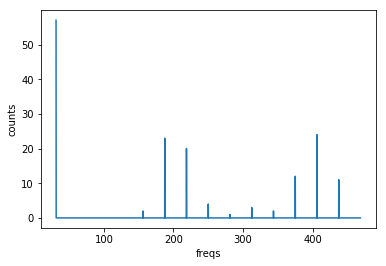

In [5]:
#dataset.select_class('Suzukii')
dataset.get_frequency_peaks()

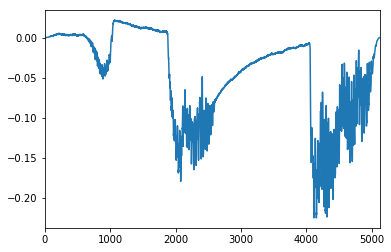

In [95]:
dataset.X.iloc[np.random.randint(0,dataset.X.shape[0])].plot()

In [92]:
dataset.X.shape

(57, 5120)

In [484]:
# sig = dataset.X.values[np.random.randint(0,321),:]
# # sig = butter_bandpass_filter(sig, L_CUTOFF, H_CUTOFF, F_S, B_ORDER)
# plot_wingbeat(data = sig)
# from scipy.signal import find_peaks
# sigt = transform_data(sig)
# peaks, _ = find_peaks(sigt, height=-99)

# # pd.Series(sigt).plot()
# # plt.plot(peaks, sigt[peaks], 'x')
# print("###############")
# pd.Series(sigt).diff().std()

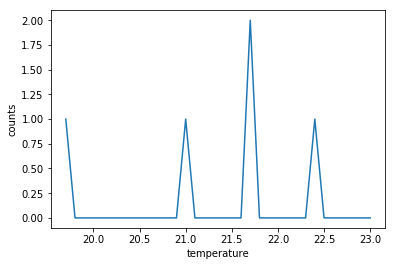

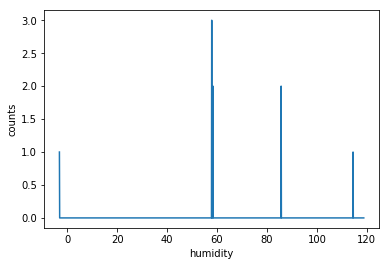

In [485]:
dataset.get_sensor_features(temp_humd=True, hist_temp=True, hist_humd=True)

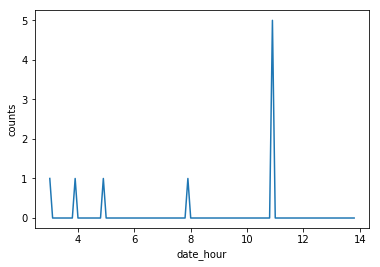

In [486]:
np_hist(dataset.df_features, 'date_hour')

In [487]:
dataset.df_features['month'] = dataset.df_features.date.apply(lambda x: x.month)
df = dataset.df_features
df.head()

,filenames,wavnames,date,date_day,date_hour,gain,temperature,humidity,month
0,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190710_044739_000_G_050_T_19.7_H_85.8,2019-07-10 04:47:39,10,4,050,19.7,85.8,7
1,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190710_050852_001_G_050_T_21.8_H_85.8,2019-07-10 05:08:52,10,5,050,21.8,85.8,7
2,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190713_035533_003_G_050_T_21.8_H_-3.1,2019-07-13 03:55:33,13,3,050,21.8,-3.1,7
3,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190712_080009_002_G_050_T_21.1_H_119.0,2019-07-12 08:00:09,12,8,050,21.1,119.0,7
4,/home/kalfasyan/data/insects/with_lamp/D_19_07...,F190716_142829_004_G_050_T_22.5_H_114.6,2019-07-16 14:28:29,16,14,050,22.5,114.6,7


In [488]:
dates = []
counts = []
for i, sub in df.groupby(['month','date_day']):
#     print(i,len(sub))
    dates.append("{}-{}-2019".format(str(i[1]).zfill(2),str(i[0]).zfill(2)))
    counts.append(len(sub))

In [489]:
df_hist = pd.DataFrame([counts,dates], index=None).T
df_hist.columns = ['counts','dates']
df_hist.index = df_hist.dates
df_hist.drop('dates', axis=1, inplace=True)
df_hist.head()

,counts
dates,
09-07-2019,5
10-07-2019,2
12-07-2019,1
13-07-2019,1
16-07-2019,1


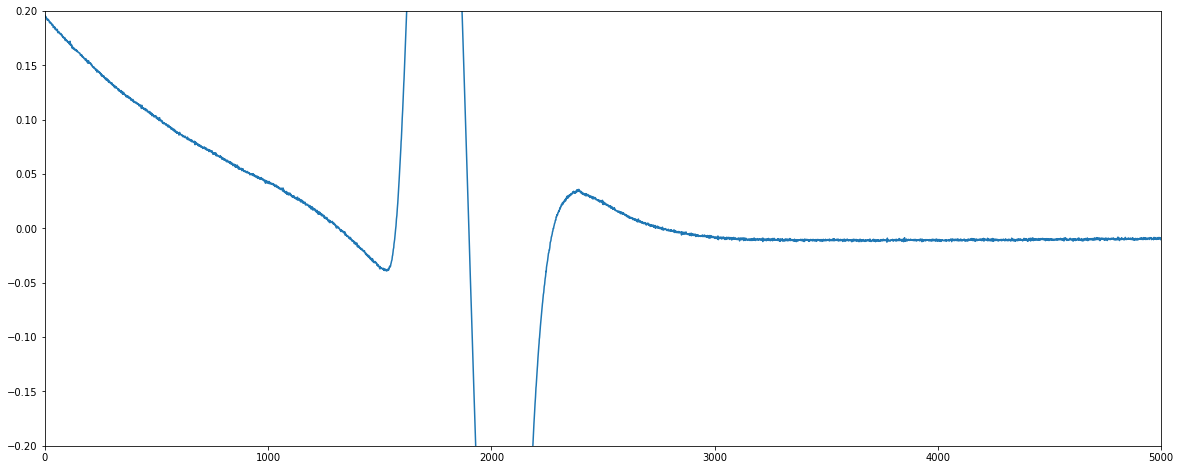

In [528]:
dataset.X.iloc[np.random.randint(0,dataset.X.shape[0]),:].plot(figsize=(20,8), ylim=(-.2,.2))

In [529]:
dataset.X.shape

(10, 5000)

In [532]:
datelist = pd.date_range(start='7/6/2019', end='7/17/2019').strftime('%d-%m-%Y').tolist()
counts = []
for d in datelist:
    if d in df_hist.index.tolist():
        print(d)
        counts.append(df_hist.loc[d].counts)
    else:
        counts.append(0)

        

09-07-2019
10-07-2019
12-07-2019
13-07-2019
16-07-2019


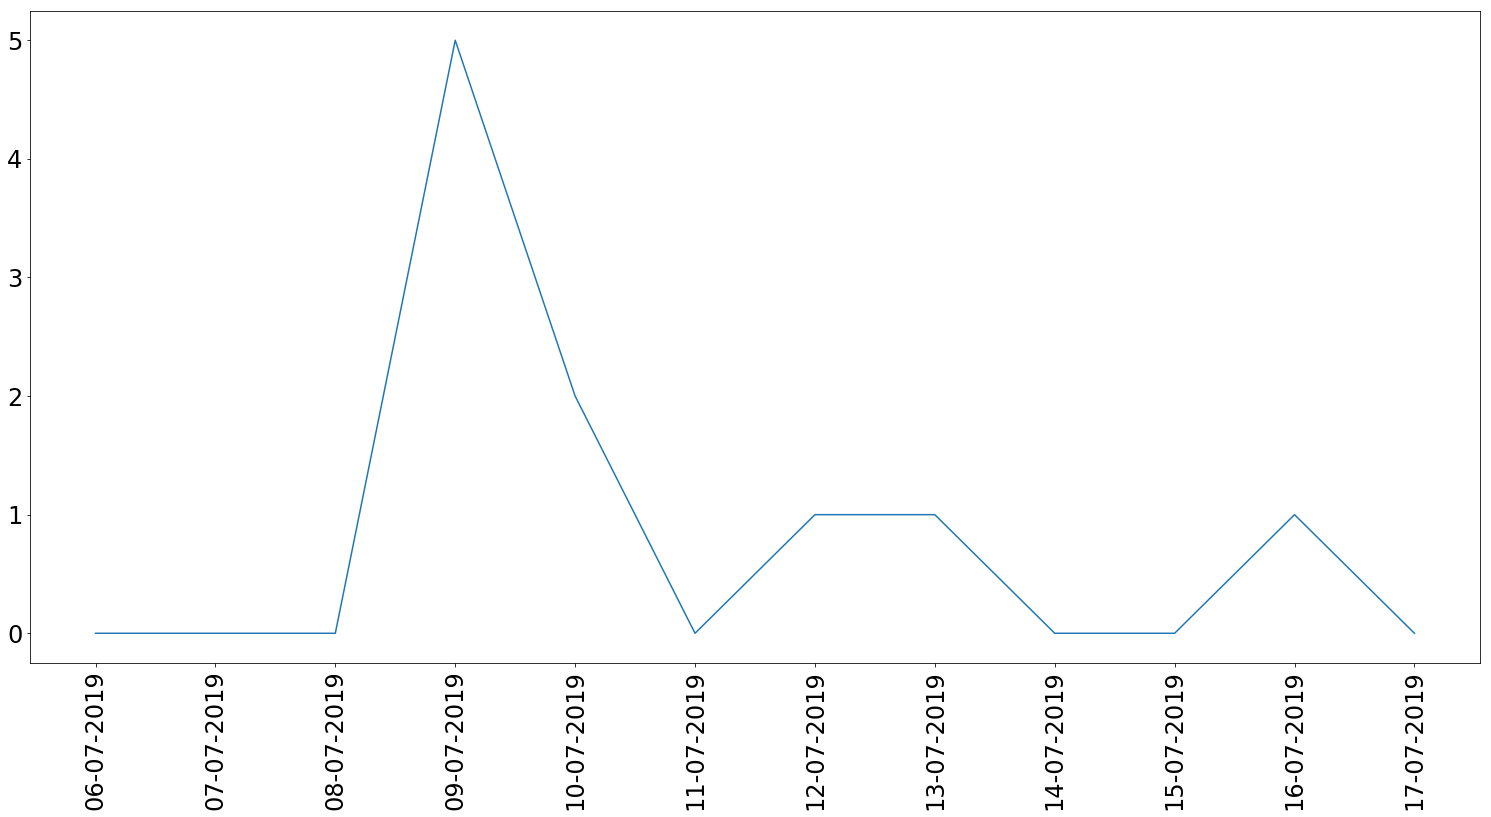

In [534]:
plt.figure(figsize=(26,12))

plt.plot(datelist,counts)

plt.xticks(rotation=90, fontsize=24);
plt.yticks(fontsize=24);